# Предсказание цен на дома


## Описание

Данные, используемые в этом проекте, были взяты с сайта Kaggle, c тренировочного соревнования под названием House Prices.

В моём распоряжении файлы с данными:

- train.csv - тренировочный датасет для обучения,

- test.csv - датасет для тестирования.

Задача: обучить модель на тренировочных данных и предсказать целевую переменную на данных для тестирования.
SalePrice - целевая переменная, которая содержит значения с ценами на дома.

Для решения задачи я использую модель множественной линейной регрессии.

## Изучение данных и предобработка

### Подключение библиотек

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Считывание данных, просмотр и изучение содержимого

In [2]:
House_Prices_data_train = pd.read_csv("train.csv")
# тренировочные данные

In [3]:
House_Prices_data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
House_Prices_data_test = pd.read_csv("test.csv")
#тестовые данные

In [5]:
House_Prices_data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
House_Prices_data_train.shape

(1460, 81)

Таблица с тренировочными данными имеет 1460 строк, 81 столбцов.

In [7]:
House_Prices_data_test.shape

(1459, 80)

Таблица с тестовыми данными имеет 1459 строк, 80 столбцов.

Далее выводы для тренировочного датасета.

In [8]:
House_Prices_data_train.columns
# имена всех имеющихся колонок

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
House_Prices_data_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Данные содержат категориальные переменные, которые требуется перекодировать для использования множественной линейной регрессии.

In [10]:
House_Prices_data_train.isna().sum().sum()

6965

Данные содержат множество пустых значений, которые нужно будет обработать.

In [11]:
House_Prices_data_train.SalePrice
# целевая переменная

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Распределение целевой переменной

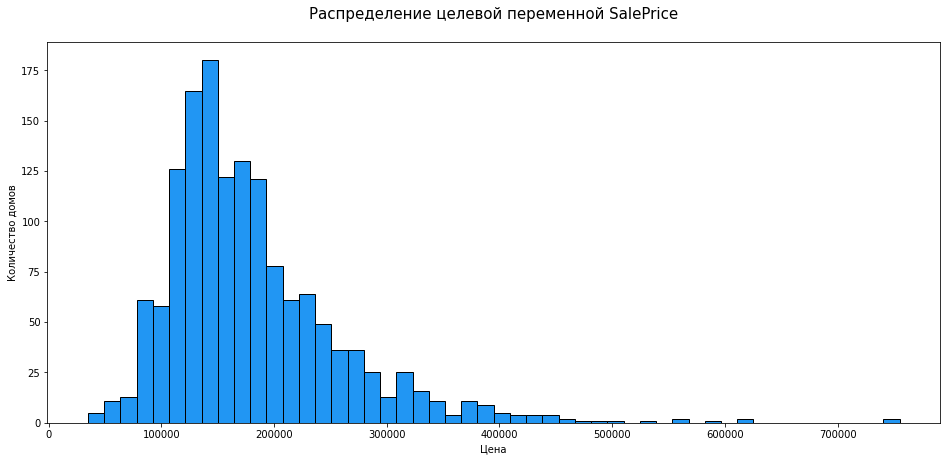

In [12]:
plt.figure(figsize=(16,7))
plt.hist(House_Prices_data_train['SalePrice'], bins=50, ec='black', color = '#2196f3')
plt.title('Распределение целевой переменной SalePrice\n', fontsize=15)
plt.xlabel('Цена')
plt.ylabel('Количество домов')
plt.show()

<AxesSubplot:xlabel='SalePrice'>

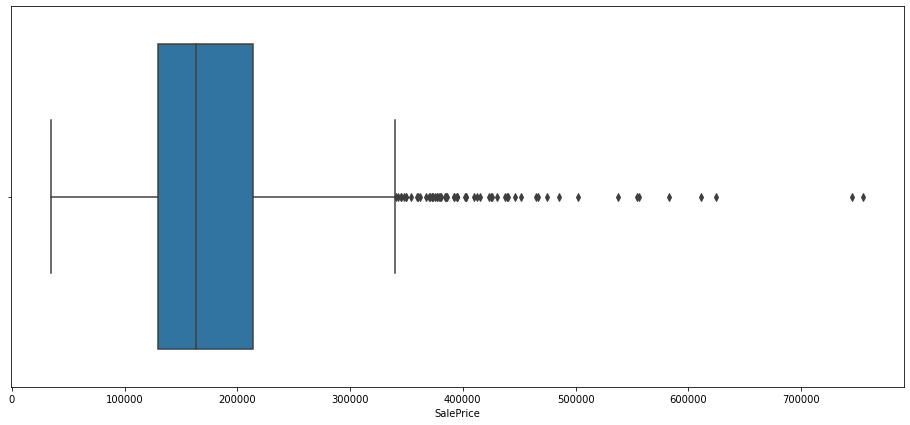

In [13]:
plt.figure(figsize=(16,7))
sns.boxplot(x = House_Prices_data_train['SalePrice'])

По графикам видно, что распределение цен является относительно нормальным, есть сдвиг влево. Можно сделать выводы, что основная часть цен на дома распределена примерно между значениями от 125 до 210 тысяч. Есть выбросы: небольшая часть домов имеет очень дорогую цену.

### Основные статистические показатели целевой переменной:

In [14]:
House_Prices_data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Преобработка данных

### Объединение тренировочного и тестового датафрейма для совместного преобразования

In [15]:
House_Prices_data_train['IsTest']=0
House_Prices_data_test['IsTest']=1
df=pd.concat([House_Prices_data_train,House_Prices_data_test])
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTest
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,1
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,1
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,1
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,1


#### Анализ наличия пустых значений в столбцах

In [16]:
nans = (df.isnull().sum() / len(df)) * 100
nans = nans.drop(nans[nans == 0].index).sort_values(ascending=False)[:30]
missed_data = pd.DataFrame({'% of nan' :nans})
missed_data.head(20)

,% of nan
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageCond,5.447071
GarageYrBlt,5.447071
GarageFinish,5.447071


Можно сделать вывод, что столбцы PoolQC, MiscFeature, Alley и Fence практически пусты и не несут значимой информации, влияющей на целевую переменную, их можно удалить. Остальные пропущенные значения можно заменить на нули (в том числе и категориальные переменные, так как они будут перекодированны в числовые значения).

In [17]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1)
#удаление почти пустых столбцов

In [18]:
df = df.fillna(0)
#замена оставшихся пустых значений на нули

In [19]:
obj = df.dtypes[House_Prices_data_train.dtypes=='object'].sort_values(ascending=False).index
for i in obj:
    df[i]=pd.factorize(df[i])[0]
# получение числового значения массивов категориальных переменных

In [20]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTest
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,2,2008,0,0,208500.0,0
1,2,20,0,80.0,9600,0,0,0,0,1,...,0,0,0,0,5,2007,0,0,181500.0,0
2,3,60,0,68.0,11250,0,1,0,0,0,...,0,0,0,0,9,2008,0,0,223500.0,0
3,4,70,0,60.0,9550,0,1,0,0,2,...,0,0,0,0,2,2006,0,1,140000.0,0
4,5,60,0,84.0,14260,0,1,0,0,1,...,0,0,0,0,12,2008,0,0,250000.0,0


### Разделение общего преобразованного датафрейма обратно на тренировочные и тестовые данные

In [21]:
House_Prices_data_train=df.query("IsTest == 0")
House_Prices_data_train=House_Prices_data_train.drop(columns=['IsTest'])
House_Prices_data_train.shape

(1460, 77)

In [22]:
House_Prices_data_test=df.query("IsTest == 1")
House_Prices_data_test=House_Prices_data_test.drop(columns=['IsTest', 'SalePrice'])
House_Prices_data_test.shape

(1459, 76)

## Корреляции

### Отбор и сортировка таких предикторов, у которых корреляция с целевой переменной больше 30%

In [23]:
corr_feat = House_Prices_data_train.corr()[House_Prices_data_train.corr()['SalePrice'] > 0.3]['SalePrice'].sort_values(ascending=False).index
print(corr_feat)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'FireplaceQu', 'BsmtFinSF1',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')


### Матрица из корреляций отобранных переменных:

In [24]:
corr_matrix = House_Prices_data_train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'FireplaceQu', 'BsmtFinSF1',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']].corr()
corr_matrix
# матрица всех корреляций

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,FireplaceQu,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101,0.472614,0.466929,0.402854,0.386420,0.324413,0.319334,0.315856
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684,0.407252,0.396765,0.360745,0.239666,0.238923,0.295493,0.308819
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389,0.388052,0.461679,0.329236,0.208171,0.247433,0.687501,0.330224
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622,0.361945,0.300789,0.267311,0.224054,0.226342,0.183926,0.213569
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600,0.370884,0.269141,0.256212,0.296970,0.224666,0.138347,0.241435
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066,0.360067,0.339519,0.280654,0.522396,0.232019,-0.174512,0.247264
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379,0.339850,0.410531,0.326669,0.445863,0.235459,-0.202646,0.211671
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046,0.272999,0.243671,0.175821,0.058543,0.187703,0.421378,0.259977
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740,0.279568,0.326114,0.242511,0.044316,0.165984,0.616423,0.234192
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855,0.311600,0.147716,0.153091,0.249503,0.224880,0.010308,0.188686


### Тепловая карта из корреляций отобранных переменных

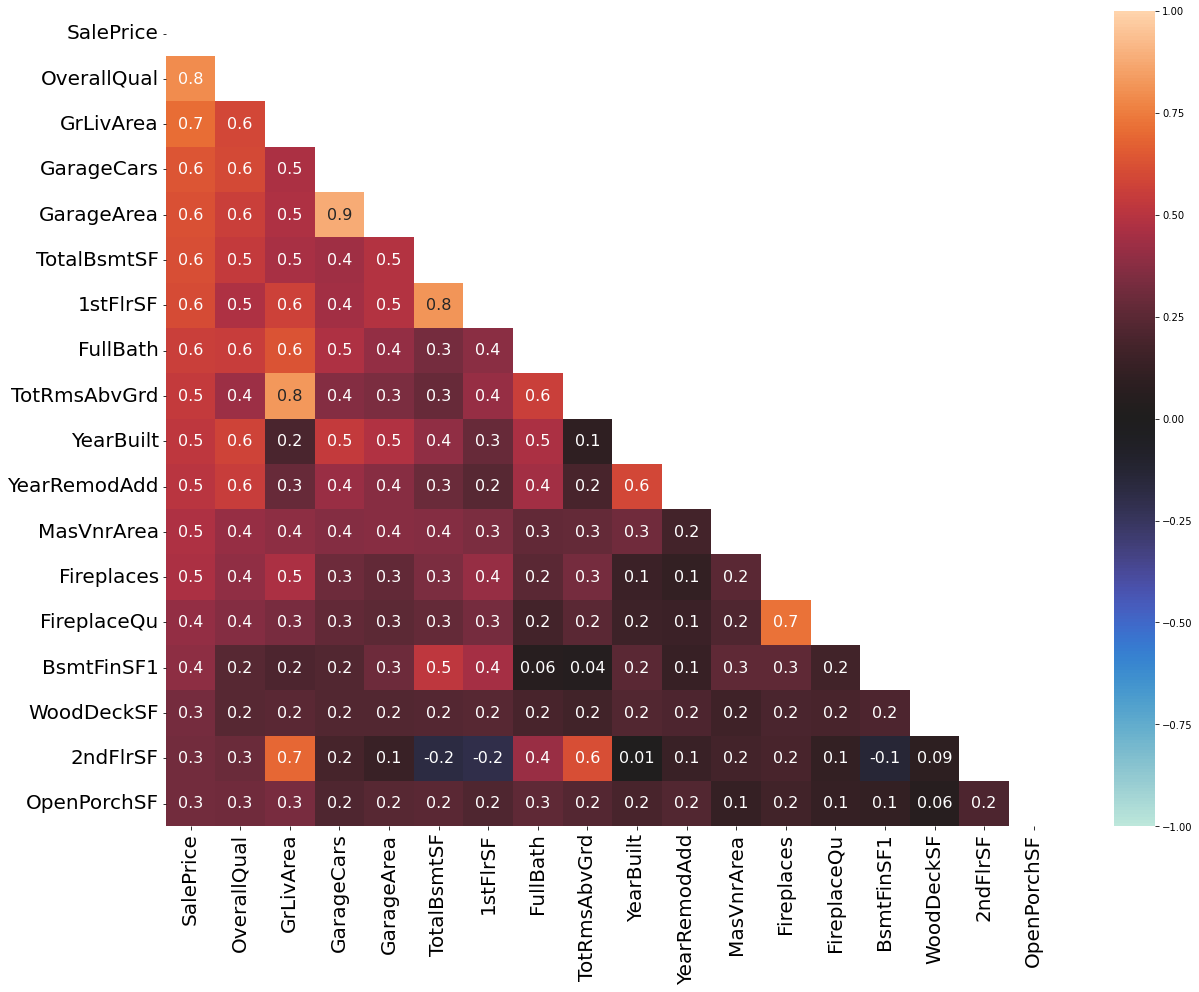

In [25]:
matrix = np.triu(corr_matrix)

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, annot_kws= {"size": 16}, vmin=-1, vmax=1, center= 0, fmt='.1g', mask = matrix)
sns.set_style('white')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Тепловая карта наглядно отображает корреляции между всеми переменными. Можно посмотреть корреляцию целевой переменной SalePrice с отобранными предикторами. Так же видно, что есть признаки, которые значительно коррелируют между собой:

0.9 - GarageArea и GarageCars,

0.8 - 1stFlrSF и TotalBsmtSF, TotRmsAbvGrd и GarageArea,

0.7 - FireplaceQu и Fireplaces, 2ndFlrSF и GrLivArea.

Переменная GarageArea имеет большую корреляцию сразу с двумя предикторами. На неё следует обратить внимание и проверить, как изменится работа модели, если её исключить.

## Диаграммы рассеяния некоторых корреляций с целевой переменной

#### Посмотрим на график, который отображает сильную корреляцию между переменными OverallQual и SalePrice:

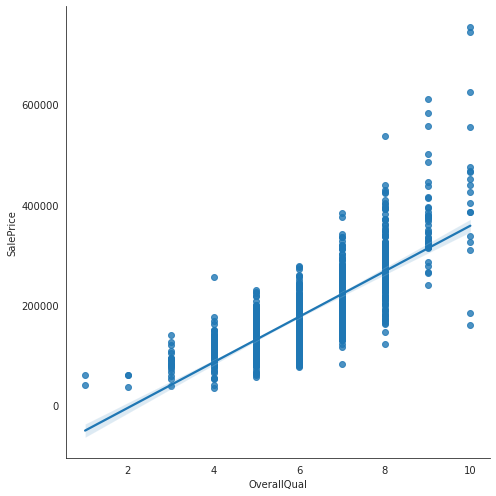

In [26]:
sns.lmplot(x='OverallQual', y= 'SalePrice', data= House_Prices_data_train, height = 7)
plt.show()

#### А так же на корреляцию между GrLivArea и SalePrice:

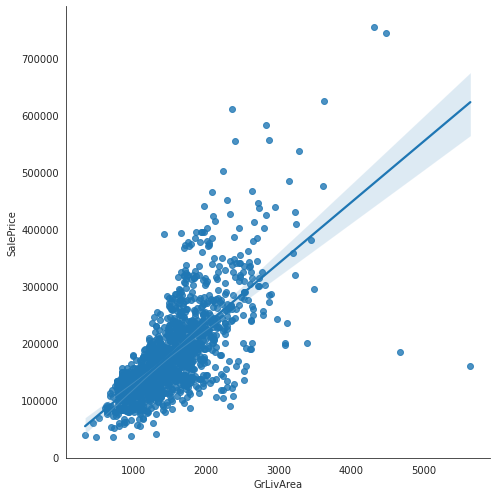

In [28]:
sns.lmplot(x='GrLivArea', y= 'SalePrice', data= House_Prices_data_train, height=7)
plt.show()

## Обучение модели множественной линейной регрессии для предсказания цен

In [29]:
X = House_Prices_data_train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'FireplaceQu', 'BsmtFinSF1',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']]
# фичи
y = House_Prices_data_train.SalePrice
# целевая переменная

### Разделение используемых данных на тренировочные и тестовые (валидационные)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

### Создание объекта для модели множественной линейной регрессии. Обучение на тренировочных данных. Проверка и вывод точности предсказаний с помощью коэффициента детерминации для тренировочных и тестовых данных. Так же вывод коэффициентов для всех переменных

In [31]:
regr  = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r_squared:', regr.score(X_train, y_train))
print('Test data r_squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data= regr.coef_, index= X_train.columns, columns=['coef'])

Training data r_squared: 0.7854325044375493
Test data r_squared: 0.814905786419531
Intercept -1074078.090966872


,coef
OverallQual,19100.096969
GrLivArea,23.918071
GarageCars,12836.954547
GarageArea,-0.457601
TotalBsmtSF,8.607444
1stFlrSF,24.710725
FullBath,-455.193586
TotRmsAbvGrd,1082.432061
YearBuilt,167.279078
YearRemodAdd,342.636784


### Проверка, можно ли отбросить некоторые переменные для упрощения модели без потери точности

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X.drop(['GarageArea'], axis=1),y, test_size=0.2, random_state=10)

regr  = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r_squared:', regr.score(X_train, y_train))
print('Test data r_squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)

Training data r_squared: 0.7854322051729389
Test data r_squared: 0.8149637965176204
Intercept -1074031.9701919542


Переменную GarageArea можно отбросить, так как точность предсказаний на тренировочных и валидационных данных от этого улучшилась.

In [33]:
House_Prices_data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,4,80.0,11622,0,0,0,0,0,...,0,0,0,120,0,0,6,2010,0,0
1,1462,20,0,81.0,14267,0,1,0,0,2,...,36,0,0,0,0,12500,6,2010,0,0
2,1463,60,0,74.0,13830,0,1,0,0,0,...,34,0,0,0,0,0,3,2010,0,0
3,1464,60,0,78.0,9978,0,1,0,0,0,...,36,0,0,0,0,0,6,2010,0,0
4,1465,120,0,43.0,5005,0,1,3,0,0,...,82,0,0,144,0,0,1,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1,21.0,1936,0,0,0,0,0,...,0,0,0,0,0,0,6,2006,0,0
1455,2916,160,1,21.0,1894,0,0,0,0,0,...,24,0,0,0,0,0,4,2006,0,1
1456,2917,20,0,160.0,20000,0,0,0,0,0,...,0,0,0,0,0,0,9,2006,0,1
1457,2918,85,0,62.0,10441,0,0,0,0,0,...,32,0,0,0,0,700,7,2006,0,0


In [34]:
X_pred = House_Prices_data_test[['OverallQual', 'GrLivArea', 'GarageCars',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'FireplaceQu', 'BsmtFinSF1',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']]

In [35]:
Y_pred = regr.predict(X_pred)

In [36]:
Y_pred


array([104095.6672979 , 169139.6826319 , 181694.76417486, ...,
       182145.13029912, 107514.20928254, 251503.98935428])

In [37]:
np.set_printoptions(threshold=10000)


### Массив с предсказаниями для тестового датасета:

In [38]:
Y_pred

array([ 1.04095667e+05,  1.69139683e+05,  1.81694764e+05,  2.08440947e+05,
        2.02594899e+05,  1.82913055e+05,  1.96711479e+05,  1.74708555e+05,
        2.21029311e+05,  1.10503589e+05,  2.26013476e+05,  1.39639429e+05,
        1.17142541e+05,  1.74312680e+05,  1.31307174e+05,  3.13542948e+05,
        2.43619107e+05,  2.98124467e+05,  2.68380128e+05,  3.96341899e+05,
        3.08231015e+05,  2.30799910e+05,  1.71359587e+05,  1.84595295e+05,
        1.98635855e+05,  2.14955697e+05,  2.81553093e+05,  2.57836853e+05,
        1.83699874e+05,  2.11841536e+05,  2.06712922e+05,  8.97743068e+04,
        2.07847024e+05,  2.84526864e+05,  2.92254899e+05,  2.36784355e+05,
        1.93220086e+05,  1.78762034e+05,  1.77440523e+05,  1.65811070e+05,
        2.03935179e+05,  1.67710134e+05,  2.65616568e+05,  2.49656578e+05,
        2.32843902e+05,  1.93562044e+05,  2.49750669e+05,  1.96756219e+05,
        1.65543801e+05,  1.43527732e+05,  1.42593389e+05,  1.66317002e+05,
        1.62755612e+05,  

### Распределение значений для предсказанной переменной

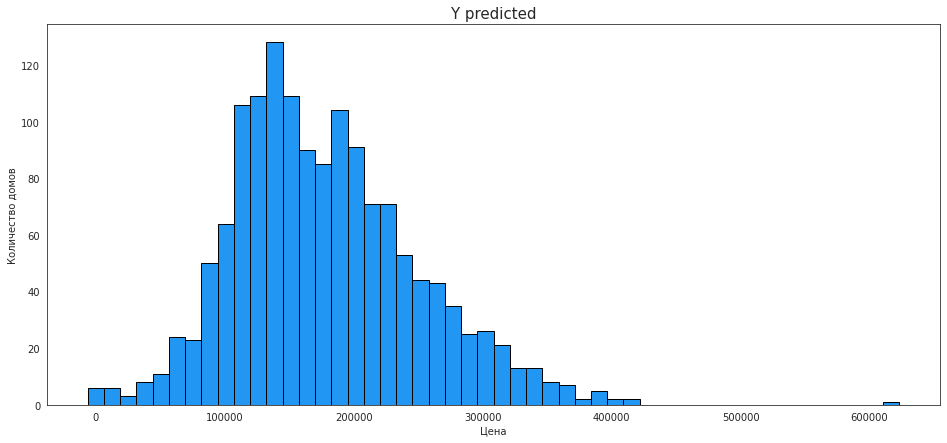

In [39]:
plt.figure(figsize=(16,7))
plt.hist(Y_pred, bins=50, ec='black', color = '#2196f3')
plt.title('Y predicted', fontsize=15)
plt.xlabel('Цена')
plt.ylabel('Количество домов')
plt.show()

## Итоговый датафрейм из тестовых данных и столбца с предсказанной переменной

In [40]:
House_Prices_data_test['SalePrice'] = Y_pred

In [41]:
House_Prices_data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,4,80.0,11622,0,0,0,0,0,...,0,0,120,0,0,6,2010,0,0,104095.667298
1,1462,20,0,81.0,14267,0,1,0,0,2,...,0,0,0,0,12500,6,2010,0,0,169139.682632
2,1463,60,0,74.0,13830,0,1,0,0,0,...,0,0,0,0,0,3,2010,0,0,181694.764175
3,1464,60,0,78.0,9978,0,1,0,0,0,...,0,0,0,0,0,6,2010,0,0,208440.946946
4,1465,120,0,43.0,5005,0,1,3,0,0,...,0,0,144,0,0,1,2010,0,0,202594.899312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1,21.0,1936,0,0,0,0,0,...,0,0,0,0,0,6,2006,0,0,65979.879207
1455,2916,160,1,21.0,1894,0,0,0,0,0,...,0,0,0,0,0,4,2006,0,1,84211.809873
1456,2917,20,0,160.0,20000,0,0,0,0,0,...,0,0,0,0,0,9,2006,0,1,182145.130299
1457,2918,85,0,62.0,10441,0,0,0,0,0,...,0,0,0,0,700,7,2006,0,0,107514.209283
